In [ ]:
!pip install kagglehub

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import kagglehub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path = kagglehub.dataset_download("mustafakeser4/bigquery-fintech-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/chun/.cache/kagglehub/datasets/mustafakeser4/bigquery-fintech-dataset/versions/1


In [ ]:
# Load dataset
# customer_path = os.path.join(path, "customer.csv")
# loan_path = os.path.join(path, "loan.csv")

# customer = pd.read_csv(customer_path)
# loan = pd.read_csv(loan_path)
# df = pd.merge(customer, loan, on='customer_id', how='inner').drop("loan_amount", axis=1)
df =pd.read_csv("/home/chun/Downloads/cs-267/project/join_df.csv")

In [ ]:
df.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'avg_cur_bal', 'Tot_cur_bal',
       'loan_status', 'loan_amount', 'state', 'funded_amount', 'term',
       'int_rate', 'installment', 'grade', 'pymnt_plan', 'type', 'purpose',
       'description'],
      dtype='object')

In [ ]:
# Assume `df` is already provided
# Drop unnecessary columns and handle missing data
df = df.drop(['emp_title', 'grade', 'loan_amount'], axis=1)  # Example based on previous context
df = df.dropna()

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop('funded_amount', axis=1)  # Replace 'funded_amount' with the actual target column name
y = df['funded_amount']



In [ ]:
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Single output node with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss=rmse_loss,  # Mean Squared Error for regression
              metrics=['mae'])  # Mean Absolute Error as an additional metric

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

Epoch 1/50


/home/chun/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17260.7168 - mae: 14683.6250 - val_loss: 6802.8691 - val_mae: 5307.1533
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 6650.1616 - mae: 5075.9248 - val_loss: 3964.8130 - val_mae: 2947.4314
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 4595.2534 - mae: 3246.2124 - val_loss: 2616.6404 - val_mae: 1839.5709
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 3592.4353 - mae: 2465.5188 - val_loss: 2248.2104 - val_mae: 1589.4470
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 3473.8452 - mae: 2380.7578 - val_loss: 2108.2324 - val_mae: 1489.1879
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 3350.9395 - mae: 2235.4248 - val_loss: 1969.4996 - val_mae: 1352.4624
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 3162.0378 - mae: 2119.9060 - val_loss: 1894.9276 - val_mae: 1314.5391
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 3058.0190 - mae: 2086.398

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        59,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,053 (820.52 KB)

 Trainable params: 70,017 (273.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 140,036 (547.02 KB)

In [ ]:
import time
model.save(f"mlp-{time.time()}.keras")

In [ ]:
pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


In [ ]:
y_test

3906    12000
4851    15000
6371     6600
2770     2500
3756    10000
        ...  
3510    10000
7679    20000
9003    28000
6629    35000
3644     5600
Name: funded_amount, Length: 1992, dtype: int64

In [ ]:
import numpy as np
pd.set_option('display.max_columns', None)
_, metrics_test, _, y_metrics_test = train_test_split(X, y, test_size=0.2, random_state=42)
purpose_columns = [col for col in metrics_test.columns if 'purpose' in col]
metrics_test['purpose'] = metrics_test[purpose_columns].idxmax(axis=1).str.replace('purpose_', '')
metrics_test['purpose']
metrics_test['prediction'] = pred
metrics_test['error'] = y_test- metrics_test['prediction']
metrics_test['abs_error'] = abs(metrics_test['error'])

# Calculate MAE and RMSE for each purpose
results = metrics_test.groupby('purpose').agg(
    MAE=('abs_error', 'mean'),
    RMSE=('error', lambda x: np.sqrt(np.mean(x**2)))
)

# Display the results
print(results)

                            MAE         RMSE
purpose                                     
credit_card          836.088386  1108.912404
debt_consolidation   919.854871  1314.242482
home_improvement    1126.387690  1593.580491
house               2014.666354  2453.666171
major_purchase       942.564716  1177.146600
medical             1099.681917  1265.468126
moving              2183.507365  2579.365999
other                815.108586  1359.152704
small_business       979.181185  1231.717047
vacation            1897.780251  2357.957464


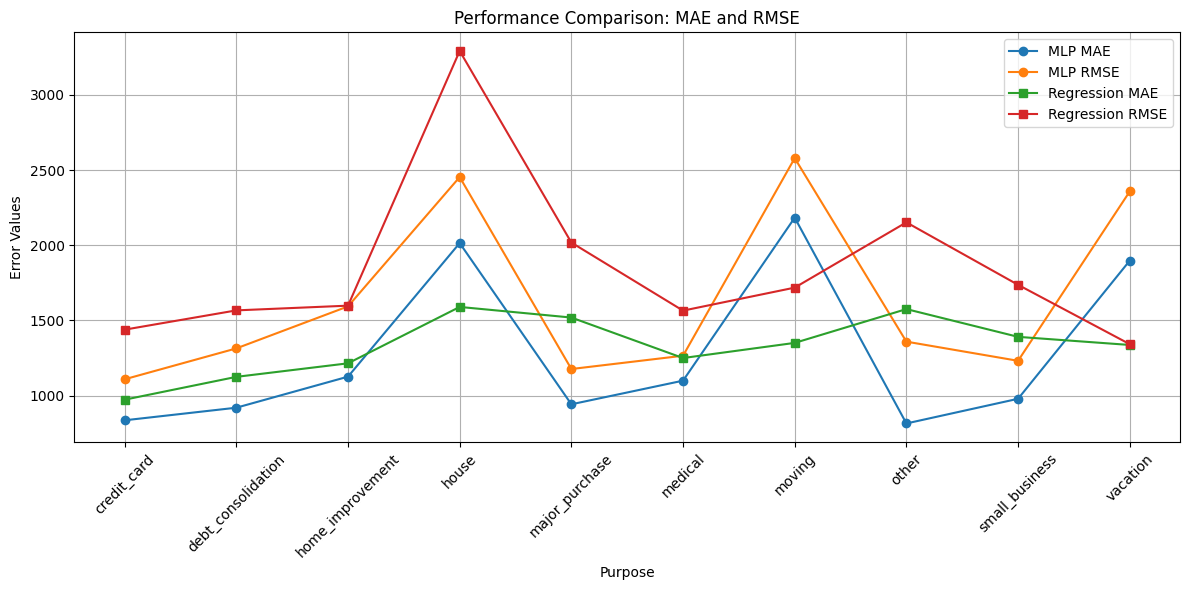

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for MLP
mlp_data = {
    "purpose": [
        "credit_card", "debt_consolidation", "home_improvement", "house",
        "major_purchase", "medical", "moving", "other",
        "small_business", "vacation"
    ],
    "MAE": [
        836.088386, 919.854871, 1126.387690, 2014.666354,
        942.564716, 1099.681917, 2183.507365, 815.108586,
        979.181185, 1897.780251
    ],
    "RMSE": [
        1108.912404, 1314.242482, 1593.580491, 2453.666171,
        1177.146600, 1265.468126, 2579.365999, 1359.152704,
        1231.717047, 2357.957464
    ]
}

# Data for Regression
regression_data = {
    "purpose": [
        "other", "small_business", "debt_consolidation", "credit_card",
        "moving", "vacation", "house", "major_purchase",
        "medical", "home_improvement"
    ],
    "MAE": [
        1575.6323360069373, 1391.0225967274293, 1125.0111932436525, 973.215261441983,
        1350.8406711389996, 1337.0917636206086, 1589.9651043092347, 1519.3693735895506,
        1250.1605250788957, 1215.043545283429
    ],
    "RMSE": [
        2152.4080257113865, 1737.01931928466, 1567.0527196055943, 1438.8781166360243,
        1718.3762543000153, 1342.3420682467847, 3292.209495796621, 2018.0853322105665,
        1565.394611972071, 1598.4826968215073
    ]
}

# Convert to DataFrames
mlp_df = pd.DataFrame(mlp_data).set_index("purpose")
regression_df = pd.DataFrame(regression_data).set_index("purpose")

# Sort the DataFrames by the index to align them
mlp_df.sort_index(inplace=True)
regression_df.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot MLP data
plt.plot(mlp_df.index, mlp_df["MAE"], label="MLP MAE", marker="o")
plt.plot(mlp_df.index, mlp_df["RMSE"], label="MLP RMSE", marker="o")

# Plot Regression data
plt.plot(regression_df.index, regression_df["MAE"], label="Regression MAE", marker="s")
plt.plot(regression_df.index, regression_df["RMSE"], label="Regression RMSE", marker="s")

# Customizing the plot
plt.title("Performance Comparison: MAE and RMSE")
plt.xlabel("Purpose")
plt.ylabel("Error Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
